In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
df=pd.DataFrame({'Name' : ['Yash','Mohit','Rahul','Aditya','Abhijeet','Arjun','Gopal'],'Perfomance' : [54,32,45,98,12,97,33]})

In [ ]:
df

,Name,Perfomance
0,Yash,54
1,Mohit,32
2,Rahul,45
3,Aditya,98
4,Abhijeet,12
5,Arjun,97
6,Gopal,33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        7 non-null      object
 1   Perfomance  7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


**Boolean Indexing (Using Logical and Relational Operators)**

In [ ]:
df[(df['Perfomance']>=54)] 

,Name,Perfomance
0,Yash,54
3,Aditya,98
5,Arjun,97


In [ ]:
df[(df.Name.str.contains("^[YA]"))]

,Name,Perfomance
0,Yash,54
3,Aditya,98
4,Abhijeet,12
5,Arjun,97


In [ ]:
df[(df.Name.str.startswith('Y')) & (df['Perfomance']>=54)]

,Name,Perfomance
0,Yash,54


In [ ]:
df.sort_values('Perfomance')

,Name,Perfomance
4,Abhijeet,12
1,Mohit,32
6,Gopal,33
2,Rahul,45
0,Yash,54
5,Arjun,97
3,Aditya,98


In [ ]:
df.sort_values('Perfomance',ascending=False,kind='mergesort')

,Name,Perfomance
3,Aditya,98
5,Arjun,97
0,Yash,54
2,Rahul,45
6,Gopal,33
1,Mohit,32
4,Abhijeet,12


Python Supports Vectorized Operations

In [ ]:
np.mean(df['Perfomance'])

53.0

Following Uses the Lambda functions and Vectorised operators of numpy to calculate proportion of runs stored

In [ ]:
df['Perfomance'].apply(lambda x : (x / np.sum(df['Perfomance']) * 100))

0    14.555256
1     8.625337
2    12.129380
3    26.415094
4     3.234501
5    26.145553
6     8.894879
Name: Perfomance, dtype: float64

In [ ]:
df

,Name,Perfomance
0,Yash,54
1,Mohit,32
2,Rahul,45
3,Aditya,98
4,Abhijeet,12
5,Arjun,97
6,Gopal,33


In [ ]:
df['Perc']=df['Perfomance'].apply(lambda x : (x / np.sum(df['Perfomance']) * 100))

In [ ]:
df

,Name,Perfomance,Perc
0,Yash,54,14.555256
1,Mohit,32,8.625337
2,Rahul,45,12.129380
3,Aditya,98,26.415094
4,Abhijeet,12,3.234501
5,Arjun,97,26.145553
6,Gopal,33,8.894879


In [ ]:
df['Jersey'] = list(range(1,8))

In [ ]:
df

,Name,Perfomance,Perc,Jersey
0,Yash,54,14.555256,1
1,Mohit,32,8.625337,2
2,Rahul,45,12.129380,3
3,Aditya,98,26.415094,4
4,Abhijeet,12,3.234501,5
5,Arjun,97,26.145553,6
6,Gopal,33,8.894879,7


Pickle File are binary files used for serilization and can store dataframes sklearn models etc

In [ ]:
df.to_pickle("/data.pkl")

In [ ]:
df_new= pd.read_pickle("/data.pkl")

In [ ]:
df_new

,Name,Perfomance,Perc,Jersey
0,Yash,54,14.555256,1
1,Mohit,32,8.625337,2
2,Rahul,45,12.129380,3
3,Aditya,98,26.415094,4
4,Abhijeet,12,3.234501,5
5,Arjun,97,26.145553,6
6,Gopal,33,8.894879,7


In [ ]:
df_new['Age'] = [30,39,34,23,44,24,37]

In [ ]:
df_new

,Name,Perfomance,Perc,Jersey,Age
0,Yash,54,14.555256,1,30
1,Mohit,32,8.625337,2,39
2,Rahul,45,12.129380,3,34
3,Aditya,98,26.415094,4,23
4,Abhijeet,12,3.234501,5,44
5,Arjun,97,26.145553,6,24
6,Gopal,33,8.894879,7,37


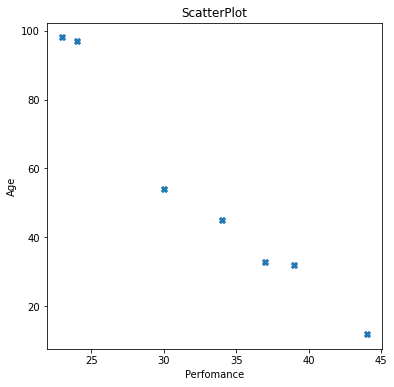

In [ ]:
plt.figure(figsize=(6,6))
plt.title('ScatterPlot')
plt.xlabel("Perfomance")
plt.ylabel("Age")
plt.scatter(df_new['Age'],df_new['Perfomance'],marker="X")

---------------------------------------------------------------------

### **PART B LINEAR REGRESSION**

Using Pseudo Inverse

A w  = B 
where A = Outer Matrix Product of Feature Vector and its Transpose and B is the Outer Matrix Product of Numeric Target Value and Feature Vector .

>  Through this we will calculate w using Psuedo inverse of A



In [ ]:
df__1=pd.DataFrame({'Sampled' : [2,5,7,9,10],'Perfomance' : [4,12,14,17,20]})

In [ ]:
x=df__1[['Sampled']]
y=df__1[['Perfomance']]

In [ ]:
Labelled=14.55

In [ ]:
np.transpose(x).shape

(1, 5)

In [ ]:
A=np.outer(x,x)
A

array([[  4,  10,  14,  18,  20],
       [ 10,  25,  35,  45,  50],
       [ 14,  35,  49,  63,  70],
       [ 18,  45,  63,  81,  90],
       [ 20,  50,  70,  90, 100]])

In [ ]:
C= np.array(y) * np.array(x)
C

array([[  8],
       [ 60],
       [ 98],
       [153],
       [200]])

In [ ]:
pseudo=np.linalg.pinv(A)


In [ ]:
W_vector = np.matmul(pseudo,C)
W_vector.shape
x.shape

(5, 1)

In [ ]:
Coefficent = np.array(np.transpose(x)) @ W_vector

#Coefficent = np.outer(x,W_vector)

In [ ]:
Coefficent=Coefficent[0,0]-Labelled

------------------------------------------------------------------------------------

Since We formed our Coefficent we gonna plot the scatter to see how well it perfoms

In [ ]:
Predicted_using_LEQ = np.array(x) * (Coefficent)

In [ ]:
Predicted_using_LEQ

array([[ 4.71467181],
       [11.78667954],
       [16.50135135],
       [21.21602317],
       [23.57335907]])

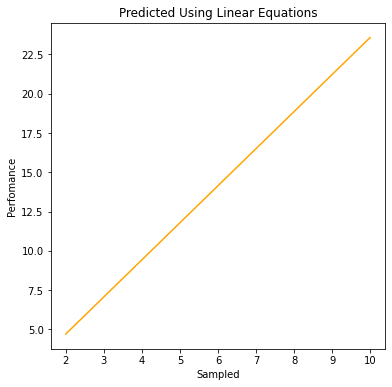

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Predicted Using Linear Equations')
plt.xlabel("Sampled")
plt.ylabel("Perfomance")
plt.plot(x,Predicted_using_LEQ,color="orange")

Now We gonna plot our Regression Line using sklearn Library

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Leg=LinearRegression()

In [ ]:
Leg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Prediction_using_Sklearn=Leg.predict(x)

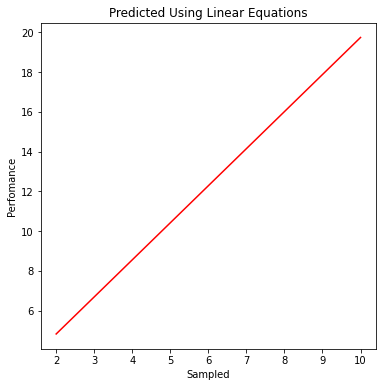

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Predicted Using Linear Equations')
plt.xlabel("Sampled")
plt.ylabel("Perfomance")
plt.plot(x,Prediction_using_Sklearn,color="red")

***The Actual Comparison Between the Plots ***

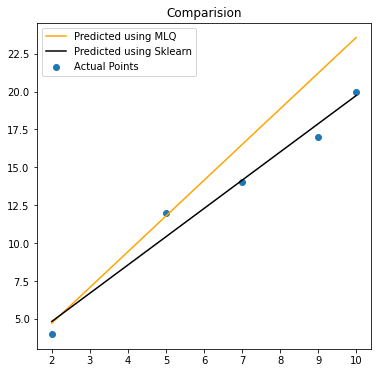

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Comparision')
plt.plot(x,Predicted_using_LEQ,color="orange",label="Predicted using MLQ")
plt.plot(x,Prediction_using_Sklearn,color="black",label="Predicted using Sklearn")
plt.scatter(x,y,label="Actual Points ")
plt.legend()
